# 0 - Library import and prior configurations

In [431]:
import pandas as pd
import numpy as np

from IPython.display import display, HTML


In [432]:
# Visualisation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1 Introducción

## 1.1 Resumen del problema
La competición "Prediction of Wild Blueberry Yield" está orientado a predecir la producción de arándanos silvestres construyendo un modelo predictivo que pueda predecir con precisión el rendimiento de los arándanos silvestres basándose en una serie de características relacionadas con el entorno de crecimiento, la polinización, el clima y las características de las propias bayas. Para lograr esto, se nos proporciona un conjunto de datos que contiene una serie de variables que deben ser analizadas y utilizadas para entrenar nuestro modelo. 

*Nuestra meta es desarrollar un modelo que sea lo más preciso posible, y que pueda ser potencialmente utilizado por agricultores y científicos para tomar decisiones más informadas acerca de la producción de arándanos silvestres.*

## 1.2 Características del Conjunto de Datos
El conjunto de datos proporciona una serie de características relevantes para la predicción del rendimiento de los arándanos silvestres. A continuación, se presenta una descripción de estas características:

- *id*: Identificador único para cada observación o registro en el conjunto de datos.
  
- *clonesize*: Se refiere al tamaño de los clones de las plantas de arándano. Las plantas de arándanos silvestres se propagan vegetativamente, formando clones a través de rizomas subterráneos (tallos que crecen bajo tierra). Estos rizomas permiten que la planta se extienda lateralmente y genere nuevas ramas y brotes genéticamente idénticos a la planta madre, formando así un clon.

    El tamaño del clon puede ser un indicador del vigor y la capacidad de propagación de una planta de arándanos silvestres. Un clon más grande puede tener más ramas y brotes, lo que podría afectar el rendimiento de la cosecha, aunque también es posible que otros factores, como las condiciones ambientales y las prácticas de manejo, influyan en la relación entre el tamaño del clon y el rendimiento.
  
- *honeybee, bumbles, andrena, osmia*: Estos campos representan diferentes especies de abejas, y es probable que se refieran a la cantidad o presencia de estas especies en el área de crecimiento de los arándanos.

<div style='display: flex; justify-content: center;'>
<table>
<tr>
<td style="padding:5px">
<img src='images\honeybee.png' style='width:300px'>
<p style='text-align:center'>Honeybee</p>
</td>
<td style="padding:5px">
<img src='images\bumble.png' style='width:300px'>
<p style='text-align:center'>Bumble</p>
</td>
<td style="padding:5px">
<img src='images\andrena.png' style='width:300px'>
<p style='text-align:center'>Andrena</p>
</td>
<td style="padding:5px">
<img src='images\osmia.png' style='width:300px'>
<p style='text-align:center'>Osmia</p>
</td>
</tr>
</table>
</div>

- *MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange*: Estos campos representan diferentes aspectos del rango de temperatura en el área de crecimiento de los arándanos.
  
- *RainingDays, AverageRainingDays*: Estos campos probablemente se refieren al número de días de lluvia y al promedio de días de lluvia en el área de crecimiento de los arándanos.
  
- *fruitset, fruitmass, seeds*: Estos campos representan diferentes aspectos de los frutos de los arándanos, incluyendo la cantidad de frutos producidos por planta, la masa de los frutos y el número de semillas por fruto.
  
- *yield*: Esta es la variable objetivo que estamos tratando de predecir. Representa la cantidad de arándanos producidos por unidad de tierra.

A través de un análisis cuidadoso y un uso eficaz de estas características, esperamos construir un modelo de aprendizaje automático que pueda predecir con precisión el rendimiento de los arándanos silvestres.

## 1.3 Acerca del mundo de los arándanos
La producción de arándanos silvestres es una industria significativa con implicaciones globales, y su éxito depende de una compleja red de factores ecológicos y agronómicos.

- *Polinización*: Un factor crítico en la producción de arándanos es la polinización, que es fundamentalmente llevada a cabo por varias especies de abejas, incluyendo las abejas melíferas, los abejorros, las Andrena y las Osmia. Estas especies son vitales para la transferencia de polen, lo que facilita la fertilización y, finalmente, la formación de frutos.
  
- *Condiciones Climáticas*: Las condiciones climáticas, en particular la temperatura y la precipitación, tienen un impacto significativo en el crecimiento de los arándanos. Las plantas de arándanos requieren un rango específico de temperaturas para prosperar, y los extremos en este rango pueden afectar adversamente el desarrollo de las flores y la formación de frutos. Además, el número de días de lluvia puede influir en la disponibilidad de agua para las plantas y la actividad de las abejas, afectando tanto la salud de las plantas como la eficacia de la polinización.
  
- *Características de las Plantas de Arándanos*: Las propiedades intrínsecas de las plantas de arándanos, como el tamaño del clon, el conjunto de frutos (fruitset), la masa del fruto (fruitmass), y el número de semillas, tienen un impacto directo en el rendimiento de la cosecha. Estas características pueden variar debido a factores genéticos y ambientales, y su interacción puede complicar la predicción del rendimiento.

La comprensión de estos factores y su interacción es fundamental para desarrollar un modelo predictivo preciso para el rendimiento de los arándanos silvestres. 

## 1.4 Metodología
Para afrontar el desafío de predecir el rendimiento de los arándanos silvestres, se propone:

- *Análisis exploratorio de datos (EDA)*: Análisis exhaustivo para comprender la naturaleza de los datos.
  
- *Preprocesamiento de datos*: Basándonos en los hallazgos del EDA, realizaremos el preprocesamiento de datos necesario. Esto puede incluir la imputación de valores faltantes, la transformación de características y la eliminación de outliers si se considera apropiado.
  
- *Ingeniería de características*: Exploraremos la creación de nuevas características a partir de las existentes para mejorar el rendimiento del modelo. Esto podría implicar la combinación de características relacionadas o la creación de características de interacción que capturen relaciones entre las características existentes.
  
- *Selección de modelos*: Probaremos varios modelos de aprendizaje automático con el objetivo de identificar el tipo de modelo más prometedor para este problema.
  
- *Optimización de hiperparámetros*: Una vez seleccionado el modelo se trabajará en la optimización de sus hiperparámetros para maximizar su rendimiento. 
  
- *Evaluación de modelos*: Finalmente, evaluaremos el rendimiento del modelo.


# 1 - Import the Data

In [433]:
# Read data    
dataTrain = pd.read_csv('input/train.csv')
dataTest = pd.read_csv('input/test.csv')

dataTrain.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [434]:
#Select all columns except the last one
X_train = dataTrain.iloc[:, :-1]
y_train = dataTrain['yield']

X_test = dataTest

In [435]:
# Print shape of data 
print(f"X_train: {X_train.shape}  X_test: {X_test.shape}")


X_train: (15289, 17)  X_test: (10194, 17)


In [436]:
X_train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512


# 2 - Transform the data

## 2.1 - Null values analysis

In [437]:
X_null_sum = X_train.isnull().sum() # Number of null values in each feature
X_nullP = round(X_train.isnull().sum()/X_train.shape[0]*100,1) # Percentage of null values in each feature rounded to 1 decimal
X_type = X_train.dtypes # Type of each feature
X_info = pd.concat([X_null_sum, X_nullP, X_type], axis=1) # Concatenate X_null, X_nullP and X_type in one dataframe
X_info.columns = ['Null', 'Null%', 'Type'] # Rename columns
X_info

,Null,Null%,Type
id,0,0.0,int64
clonesize,0,0.0,float64
honeybee,0,0.0,float64
bumbles,0,0.0,float64
andrena,0,0.0,float64
osmia,0,0.0,float64
MaxOfUpperTRange,0,0.0,float64
MinOfUpperTRange,0,0.0,float64
AverageOfUpperTRange,0,0.0,float64
MaxOfLowerTRange,0,0.0,float64


No null values found on the dataset

Splitting Cabin feature

## 3 - Feature engineering

In [438]:
# Show sum of unique values in each feature
X_train.nunique()

id                      15289
clonesize                   6
honeybee                    7
bumbles                    11
andrena                    16
osmia                      14
MaxOfUpperTRange            6
MinOfUpperTRange            5
AverageOfUpperTRange        5
MaxOfLowerTRange            6
MinOfLowerTRange            7
AverageOfLowerTRange        5
RainingDays                 6
AverageRainingDays          8
fruitset                 1526
fruitmass                1515
seeds                    2066
dtype: int64

In [439]:
# Get columns with sum of unique values below 10
X_features_UV_B10 = X_train.nunique()[X_train.nunique() < 10]
X_features_UV_B10.head(20)

clonesize               6
honeybee                7
MaxOfUpperTRange        6
MinOfUpperTRange        5
AverageOfUpperTRange    5
MaxOfLowerTRange        6
MinOfLowerTRange        7
AverageOfLowerTRange    5
RainingDays             6
AverageRainingDays      8
dtype: int64

## 3.1 - Correlacion entre variables

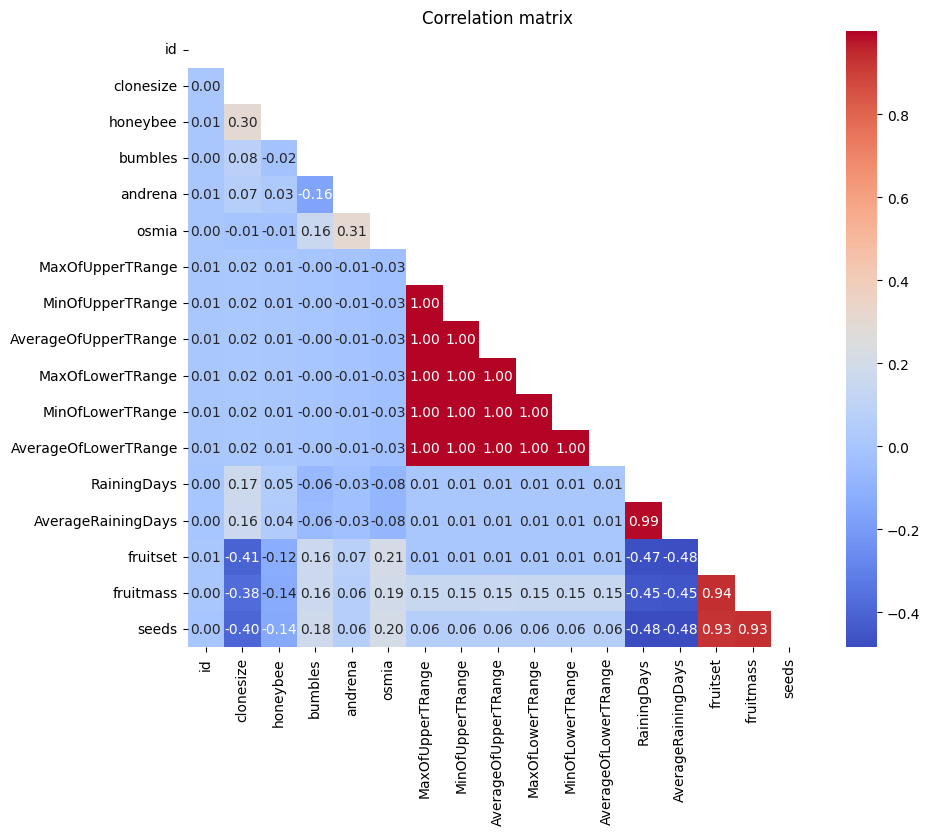

In [440]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación
corr_matrix = X_train.corr()

# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar la figura de matplotlib
plt.figure(figsize=(10, 8))

# Dibujar el heatmap con la máscara
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title("Correlation matrix")
plt.show()


We can see that ther is a strong correlation between:
- AverageOfLowerTRange, MinOfLowerTRange, MaxOfLowerTRange, AverageOfUpperTRange and MinofUpperTRange.
- RainingDays and AverageRainingDays
- Seeds, fruitset and fruitmass
So we simplify selecting the following features: MaxOfUpperTRange, AverageRainingDays and seedds.

In [441]:
# Drop from X_train: MaxOfUpperTRange, AverageRainingDays and seedds.
columns_to_drop=['id','AverageOfLowerTRange', 'MinOfLowerTRange', 'MaxOfLowerTRange', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'RainingDays', 'fruitset', 'fruitmass']
X_train = X_train.drop(columns_to_drop, axis=1)
X_train.head()

# Drop from X_trX_test: MaxOfUpperTRange, AverageRainingDays and seedds.
columns_to_drop=['AverageOfLowerTRange', 'MinOfLowerTRange', 'MaxOfLowerTRange', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'RainingDays', 'fruitset', 'fruitmass']
X_test = X_test.drop(columns_to_drop, axis=1)

## 3.2 Spearman correlation

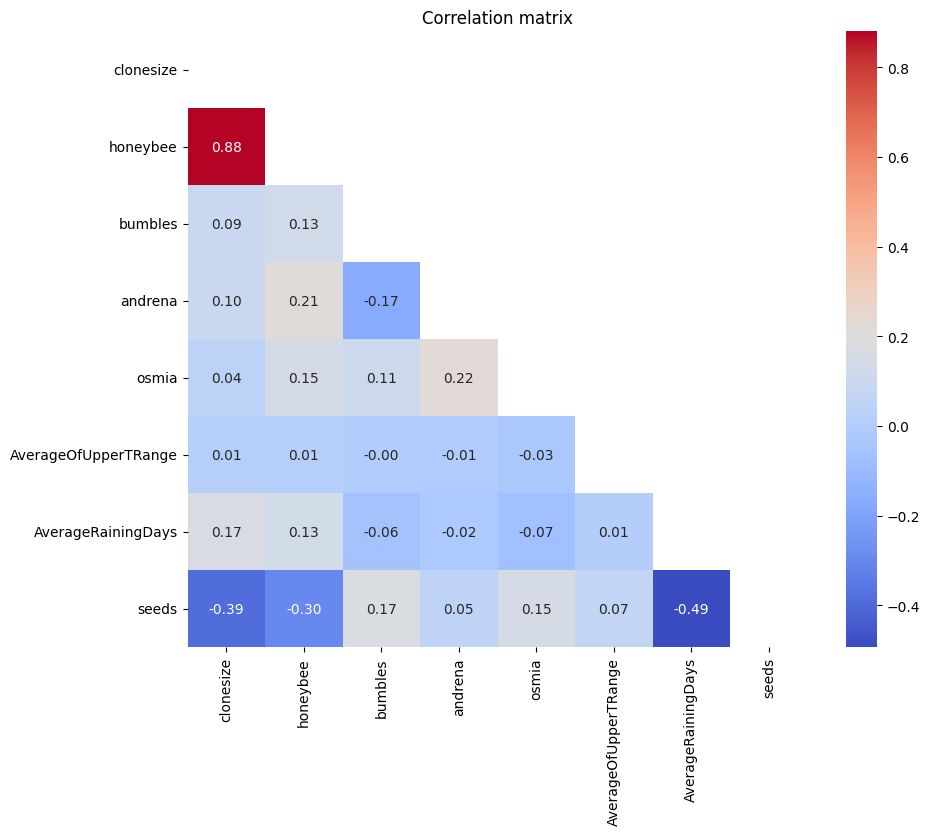

In [442]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Spearman correlation 
corr_matrix = X_train.corr(method='spearman')

# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar la figura de matplotlib
plt.figure(figsize=(10, 8))

# Dibujar el heatmap con la máscara
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title("Correlation matrix")
plt.show()


We decide to drop 'honeybee' feature

In [443]:
"""X_train = X_train.drop(['honeybee'], axis=1) # Drop honeybee from X_train
X_test = X_test.drop(['honeybee'], axis=1) # Drop honeybee from X_test
X_train.head()"""

"X_train = X_train.drop(['honeybee'], axis=1) # Drop honeybee from X_train\nX_test = X_test.drop(['honeybee'], axis=1) # Drop honeybee from X_test\nX_train.head()"

# 3.3 Boxplot for each feature

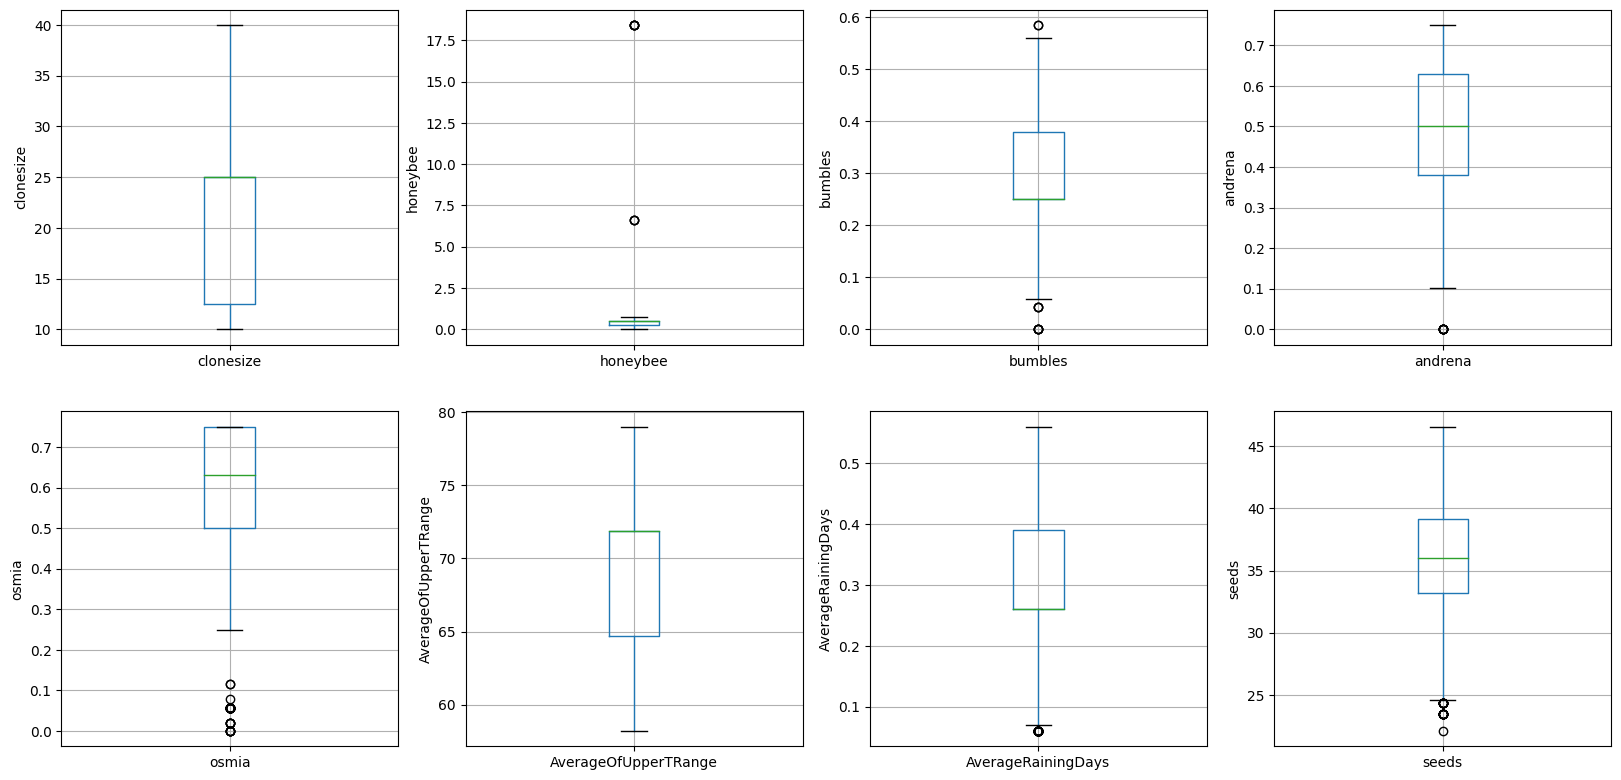

In [444]:
# Boxplot for each feature in X_train dataset 
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train.columns):
    plt.subplot(4, 4, i+1)
    X_train.boxplot(col)
    plt.ylabel(col)
    

In [446]:
# Sustituir valores de bumbles, andrena, osmia, AverageRainingDays, seeds and honeybee por debajo de Q1 - 1.5*IQR y por encima de Q3 + 1.5*IQR por Q1 - 1.5*IQR y Q3 + 1.5*IQR respectivamente
Q1 = X_train['bumbles'].quantile(0.25)
Q3 = X_train['bumbles'].quantile(0.75)
IQR = Q3 - Q1
X_train['bumbles'] = np.where(X_train['bumbles'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_train['bumbles'])
X_train['bumbles'] = np.where(X_train['bumbles'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_train['bumbles'])

X_test['bumbles'] = np.where(X_test['bumbles'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_test['bumbles'])
X_test['bumbles'] = np.where(X_test['bumbles'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_test['bumbles'])


Q1 = X_train['andrena'].quantile(0.25)
Q3 = X_train['andrena'].quantile(0.75)
IQR = Q3 - Q1
X_train['andrena'] = np.where(X_train['andrena'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_train['andrena'])
X_train['andrena'] = np.where(X_train['andrena'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_train['andrena'])

X_test['andrena'] = np.where(X_test['andrena'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_test['andrena'])
X_test['andrena'] = np.where(X_test['andrena'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_test['andrena'])

Q1 = X_train['osmia'].quantile(0.25)
Q3 = X_train['osmia'].quantile(0.75)
IQR = Q3 - Q1
X_train['osmia'] = np.where(X_train['osmia'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_train['osmia'])
X_train['osmia'] = np.where(X_train['osmia'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_train['osmia'])

X_test['osmia'] = np.where(X_test['osmia'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_test['osmia'])
X_test['osmia'] = np.where(X_test['osmia'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_test['osmia'])


Q1 = X_train['seeds'].quantile(0.25)
Q3 = X_train['seeds'].quantile(0.75)
IQR = Q3 - Q1
X_train['seeds'] = np.where(X_train['seeds'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_train['seeds'])
X_train['seeds'] = np.where(X_train['seeds'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_train['seeds'])

X_test['seeds'] = np.where(X_test['seeds'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_test['seeds'])
X_test['seeds'] = np.where(X_test['seeds'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_test['seeds'])

Q1 = X_train['AverageRainingDays'].quantile(0.25)
Q3 = X_train['AverageRainingDays'].quantile(0.75)
IQR = Q3 - Q1
X_train['AverageRainingDays'] = np.where(X_train['AverageRainingDays'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_train['AverageRainingDays'])
X_train['AverageRainingDays'] = np.where(X_train['AverageRainingDays'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_train['AverageRainingDays'])

X_test['AverageRainingDays'] = np.where(X_test['AverageRainingDays'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_test['AverageRainingDays'])
X_test['AverageRainingDays'] = np.where(X_test['AverageRainingDays'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_test['AverageRainingDays'])

Q1 = X_train['honeybee'].quantile(0.25)
Q3 = X_train['honeybee'].quantile(0.75)
IQR = Q3 - Q1
X_train['honeybee'] = np.where(X_train['honeybee'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_train['honeybee'])
X_train['honeybee'] = np.where(X_train['honeybee'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_train['honeybee'])

X_test['honeybee'] = np.where(X_test['honeybee'] < (Q1 - 1.5*IQR), Q1 - 1.5*IQR, X_test['honeybee'])
X_test['honeybee'] = np.where(X_test['honeybee'] > (Q3 + 1.5*IQR), Q3 + 1.5*IQR, X_test['honeybee'])

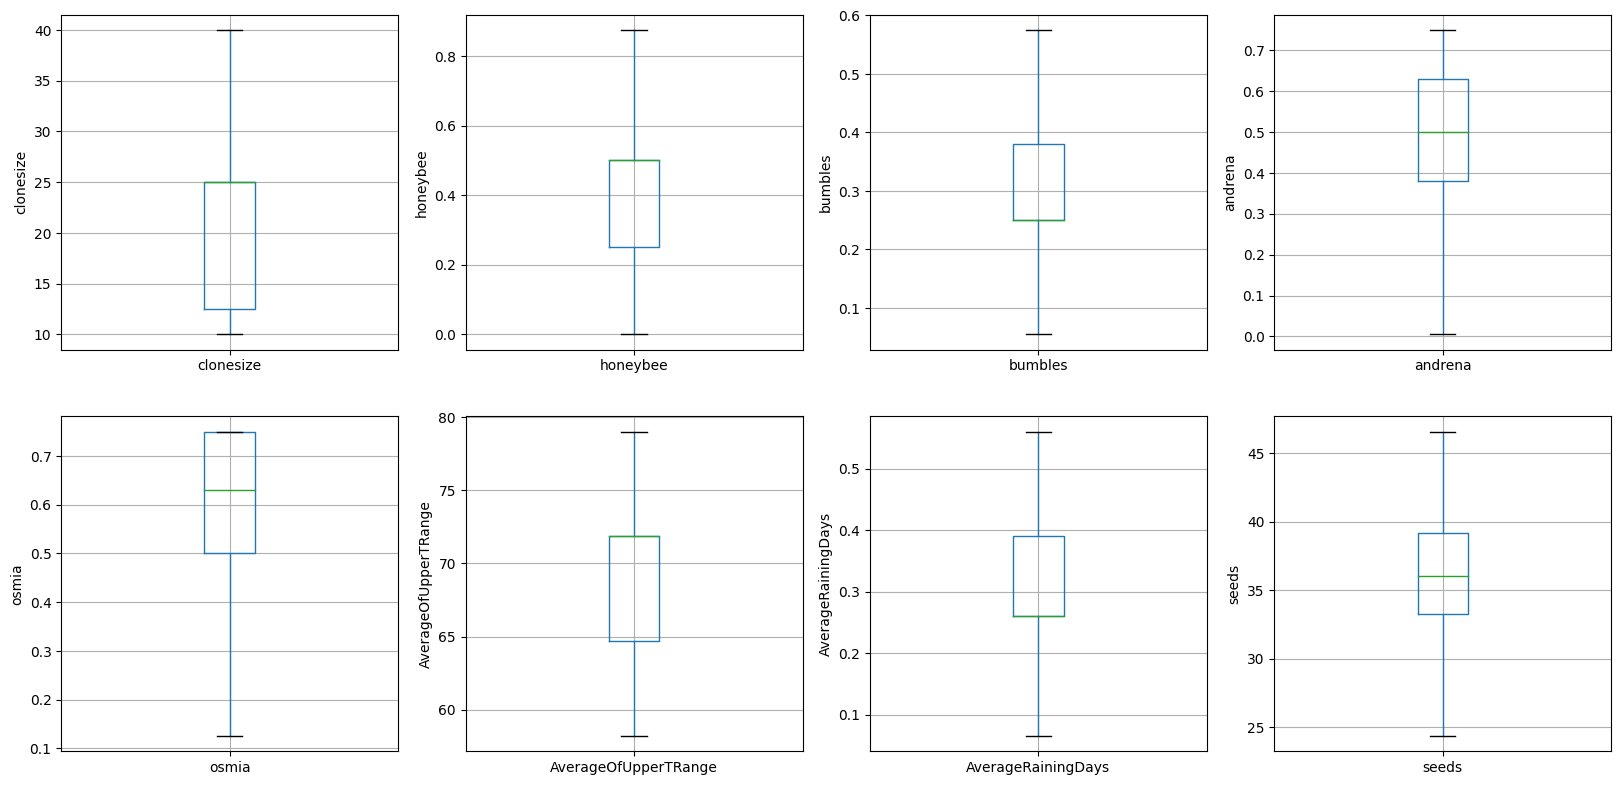

In [447]:
# Hacer un grafico boxplot para cada feature en una tabla de 4x4
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train.columns):
    plt.subplot(4, 4, i+1)
    X_train.boxplot(col)
    plt.ylabel(col)

# 4 - Modeling

## 4.2 - Previous

In [404]:
# Shape of X_train, X_test, y_train and y_test
print(f"X_train: {X_train.shape}  X_test: {X_test.shape}")

X_train: (15289, 8)  X_test: (10194, 9)


In [405]:
X_train.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'AverageRainingDays', 'seeds'],
      dtype='object')

## 4.2 - Comparison between models

In [406]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

# Define los modelos
models = [
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('SVR', SVR()),
    ('DecisionTree', DecisionTreeRegressor()),
    ('RandomForest', RandomForestRegressor()),
    ('XGB', XGBRegressor()),
    ('LGBM', LGBMRegressor())
]

# Evalúa los modelos utilizando validación cruzada
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

# Compara los modelos
plt.boxplot(results, labels=names)
plt.title('Comparación de modelos de regresión')
plt.show()


LinearRegression: -414609.5449140843 (19989.07708564692)
Ridge: -414608.53783982724 (19996.20447713564)
Lasso: -415098.5443567248 (20093.126259464505)


KeyboardInterrupt: 

LightGBM seems to be the best model for this dataset. Let's try to tune it.

# 4.3. LightGBM model hyperparameter tuning

## 4.3 - Selección de modelos y justificación
Se probará directamente con LighGBM al no ser el conjuntod de datos de masiados elevado y poder ir bien a priorr, aunque modelos más simples podrían ser interesantes.

In [459]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Espacio de hiperparámetros
space = {
    'num_leaves': hp.choice('num_leaves', range(15, 150)), # 15 - 150
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'n_estimators': hp.choice('n_estimators', range(10, 1000)),
    'min_child_samples': hp.choice('min_child_samples', range(20, 500)),
    'subsample': hp.uniform('subsample', 0.5, 0.8), 
    'colsample_bytree': hp.uniform('colsample_bytree', 0.65, 1.), 
    'max_bin': hp.choice('max_bin', range(10, 2000))
    }

# Función objetivo
def objective(space):
    model = lgb.LGBMRegressor(
        objective = 'regression',
        num_leaves = int(space['num_leaves']),
        max_depth = int(space['max_depth']),
        learning_rate = space['learning_rate'],
        n_estimators = int(space['n_estimators']),
        min_child_samples = int(space['min_child_samples']),
        subsample = space['subsample'],
        colsample_bytree = space['colsample_bytree'],
        max_bin = int(space['max_bin']),
    )
    
    # Error cuadrático medio en la validación cruzada
    mse = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()
    return {'loss': -mse, 'status': STATUS_OK }

# Optimización
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
print(best)

 68%|██████▊   | 34/50 [01:05<00:25,  1.58s/trial, best loss: 388490.39309064206]

In [456]:
# Ajustar el modelo con los mejores hiperparámetros encontrados
best_model = lgb.LGBMRegressor(
    num_leaves = int(best['num_leaves']),
    max_depth = int(best['max_depth']),
    learning_rate = best['learning_rate'],
    n_estimators = int(best['n_estimators']),
    min_child_samples = int(best['min_child_samples']),
    subsample = best['subsample'],
    colsample_bytree = best['colsample_bytree'],
    objective = 'regression',
    max_bin = int(best['max_bin'])
    )

best_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
#Select all columns from X_test except the first one
y_pred = best_model.predict(X_test.iloc[:, 1:])


In [457]:
X_test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageRainingDays,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,71.9,0.39,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,79.0,0.10,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,71.9,0.26,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,71.9,0.26,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,79.0,0.39,29.558019


In [458]:
# Output for submission
# Round predictions to the 3 decimal places
output = pd.DataFrame({'id': X_test['id'],
                       'yield': np.round(y_pred, 3)})
output.to_csv('submission.csv', index=False) 